## Preprocessing the Data

### About Project
This project is to segment users based on their reviews to the given 24 categories and to describe the variation in the different types of users that a travel agency interacts with. My main assumption about data is that Users tend to give ratings according to their tastes.

### About Data
This data set is populated by capturing user ratings from Google reviews. Reviews on attractions from 24 categories across Europe are considered. Google user rating ranges from 1 to 5 and average user rating per category is calculated.

#### 1.Importing the requred

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True)  

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [5]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

#### 2.Importing the table

In [6]:
df=pd.read_csv("google_review_ratings.csv")
print(df.head())
print("-----------------------------------------------------------------------------------------------")
print("Columns names")
print(df.columns)

     User  Category 1  Category 2  Category 3  Category 4  Category 5  \
0  User 1         0.0         0.0        3.63        3.65         5.0   
1  User 2         0.0         0.0        3.63        3.65         5.0   
2  User 3         0.0         0.0        3.63        3.63         5.0   
3  User 4         0.0         0.5        3.63        3.63         5.0   
4  User 5         0.0         0.0        3.63        3.63         5.0   

   Category 6  Category 7  Category 8  Category 9  ...  Category 16  \
0        2.92         5.0        2.35        2.33  ...         0.59   
1        2.92         5.0        2.64        2.33  ...         0.59   
2        2.92         5.0        2.64        2.33  ...         0.59   
3        2.92         5.0        2.35        2.33  ...         0.59   
4        2.92         5.0        2.64        2.33  ...         0.59   

  Category 17  Category 18  Category 19  Category 20  Category 21  \
0         0.5          0.0          0.5          0.0          0.0

#### 3.Describing data

In [7]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [8]:
print("Data Description")
print(df.describe())
print("-----------------------------------------------------------------------------------------------")
print("Number of rows and columns")
print(df.shape)
print("-----------------------------------------------------------------------------------------------")
print("data information")
print(df.info())
print("-----------------------------------------------------------------------------------------------")

Data Description
        Category 1   Category 2   Category 3   Category 4   Category 5  \
count  5456.000000  5456.000000  5456.000000  5456.000000  5456.000000   
mean      1.455720     2.319707     2.489331     2.796886     2.958941   
std       0.827604     1.421438     1.247815     1.309159     1.339056   
min       0.000000     0.000000     0.000000     0.830000     1.120000   
25%       0.920000     1.360000     1.540000     1.730000     1.770000   
50%       1.340000     1.905000     2.060000     2.460000     2.670000   
75%       1.810000     2.682500     2.740000     4.092500     4.312500   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

       Category 6   Category 7   Category 8   Category 9  Category 10  ...  \
count  5456.00000  5456.000000  5456.000000  5456.000000  5456.000000  ...   
mean      2.89349     3.351395     2.540795     3.126019     2.832729  ...   
std       1.28240     1.413492     1.111391     1.356802     1.307665  ...   
min 

In [9]:
print("Data percentaile")
print(df.describe(percentiles=[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))
print("------------ -----------------------------------------------------------------------------------")
print("Checking for null")
print(df.isnull().sum())
#after varyfing the data we found that there is no missing of data
print("there is no null or missing data in the selected sourse")

Data percentaile
        Category 1   Category 2   Category 3   Category 4   Category 5  \
count  5456.000000  5456.000000  5456.000000  5456.000000  5456.000000   
mean      1.455720     2.319707     2.489331     2.796886     2.958941   
std       0.827604     1.421438     1.247815     1.309159     1.339056   
min       0.000000     0.000000     0.000000     0.830000     1.120000   
1%        0.000000     0.000000     0.860000     1.260000     1.255500   
2%        0.000000     0.510000     1.180000     1.311000     1.321000   
3%        0.000000     0.550000     1.260000     1.330000     1.340000   
4%        0.510000     0.600000     1.280000     1.350000     1.370000   
5%        0.550000     0.640000     1.310000     1.360000     1.390000   
6%        0.570000     0.720000     1.320000     1.380000     1.400000   
7%        0.590000     0.760000     1.350000     1.390000     1.420000   
8%        0.624000     0.790000     1.370000     1.400000     1.430000   
9%        0.660000   

There are some feature which is a number but data type is in object so we changing the data type

In [10]:
Cols = [str(i) for i in range(1,25)]
Cols =['Category '+i for i in Cols]

In [11]:
for i in Cols:
    df[i] = pd.to_numeric(df[i],errors = 'coerce')

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5455 non-null   float64
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

#### 4.Checking for Null data and duplicates and removing them

In [13]:
print(df.isnull().any())

User           False
Category 1     False
Category 2     False
Category 3     False
Category 4     False
Category 5     False
Category 6     False
Category 7     False
Category 8     False
Category 9     False
Category 10    False
Category 11     True
Category 12     True
Category 13    False
Category 14    False
Category 15    False
Category 16    False
Category 17    False
Category 18    False
Category 19    False
Category 20    False
Category 21    False
Category 22    False
Category 23    False
Category 24     True
dtype: bool


we have null values

In [14]:
df = df.fillna(df.mean()) #replacing null with mean

In [15]:
df.isnull().any()

User           False
Category 1     False
Category 2     False
Category 3     False
Category 4     False
Category 5     False
Category 6     False
Category 7     False
Category 8     False
Category 9     False
Category 10    False
Category 11    False
Category 12    False
Category 13    False
Category 14    False
Category 15    False
Category 16    False
Category 17    False
Category 18    False
Category 19    False
Category 20    False
Category 21    False
Category 22    False
Category 23    False
Category 24    False
dtype: bool

In [16]:
print(df.duplicated().any())

False


#### 5.Data Exploration (EDA)

In [17]:
New_cols = ['user_id', 'churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums', 'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services', 'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars', 'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries', 'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens']
df.columns = New_cols

In [18]:
x = df.copy()
new = x['user_id'].str.split(' ',n=2,expand=True)
x['user'] = new[0]
x['id'] = new[1]
x = x.drop(['user_id','user'],axis=1)
print(x.head())

   churches  resorts  beaches  parks  theatres  museums  malls   zoo  \
0       0.0      0.0     3.63   3.65       5.0     2.92    5.0  2.35   
1       0.0      0.0     3.63   3.65       5.0     2.92    5.0  2.64   
2       0.0      0.0     3.63   3.63       5.0     2.92    5.0  2.64   
3       0.0      0.5     3.63   3.63       5.0     2.92    5.0  2.35   
4       0.0      0.0     3.63   3.63       5.0     2.92    5.0  2.64   

   restaurants  pubs_bars  ...  dance_clubs  swimming_pools  gyms  bakeries  \
0         2.33       2.64  ...         0.59             0.5   0.0       0.5   
1         2.33       2.65  ...         0.59             0.5   0.0       0.5   
2         2.33       2.64  ...         0.59             0.5   0.0       0.5   
3         2.33       2.64  ...         0.59             0.5   0.0       0.5   
4         2.33       2.64  ...         0.59             0.5   0.0       0.5   

   beauty_spas  cafes  view_points  monuments  gardens  id  
0          0.0    0.0          

#### 6.Visualizeing and Analysing the Data

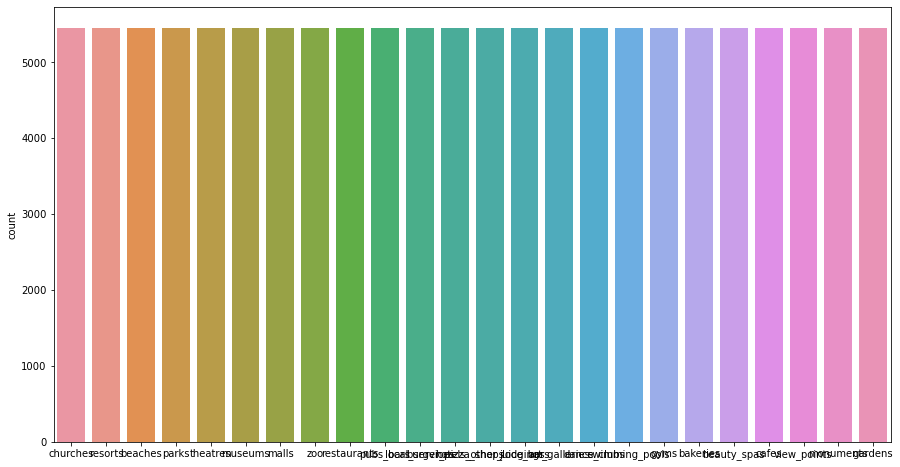

In [19]:
plt.figure(figsize=[15,8])
sns.countplot(data=x)
plt.show()

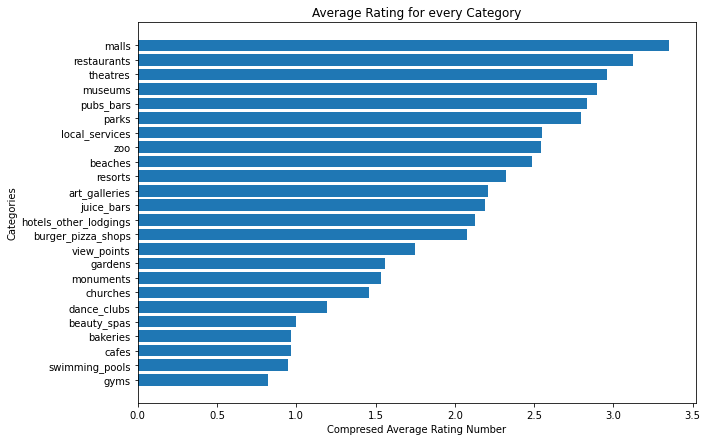

In [20]:
AvgR = df[New_cols[1:]].mean()
AvgR = AvgR.sort_values()
plt.figure(figsize=(10,7))
plt.barh(np.arange(len(New_cols[1:])), AvgR.values, align='center')
plt.yticks(np.arange(len(New_cols[1:])), AvgR.index)
plt.ylabel('Categories')
plt.xlabel('Compresed Average Rating Number')
plt.title('Average Rating for every Category')
plt.show()

Here is the Horizontal Bar Graph representing the Mean/Average aspect review of each Category

In [21]:
New_cols.remove('user_id')

In [22]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [23]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 

In [24]:
df[New_cols].iplot(kind='box')

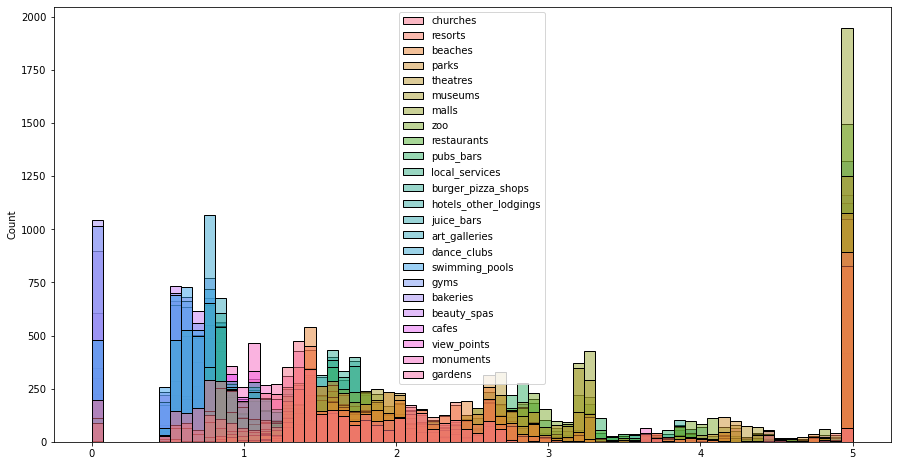

In [25]:
plt.figure(figsize=[15,8])
sns.histplot(data=x)
plt.show()

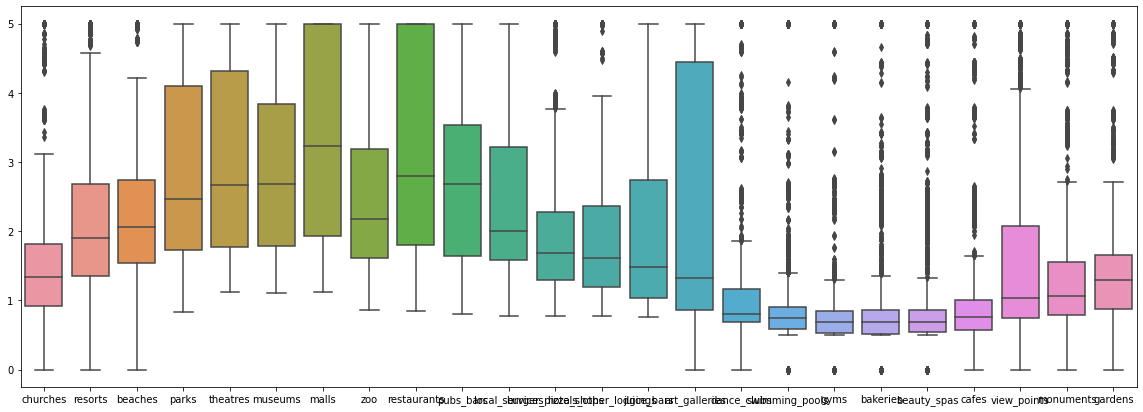

In [26]:
plt.figure(figsize=[20,7])
sns.boxplot(data=x)
plt.show()

Here is the boxplot visualization of every Category

#### 7.Hierarchial Clustering

In [27]:
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import scale as s
from scipy.cluster.hierarchy import dendrogram, linkage

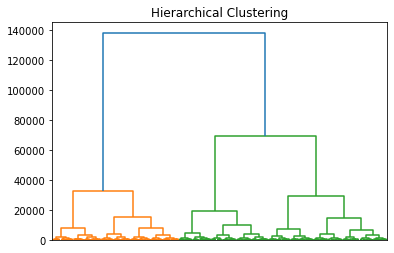

In [28]:
Z = sch.linkage(x,method='ward')
den = sch.dendrogram(Z)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,     
    top=False,         
    labelbottom=False) 
plt.title('Hierarchical Clustering')
plt.show()

Graph Description: By looking at the above dendrogram, we observe 3 distinct colors in the dendrogram, but this will not determine how many clusters are formed.

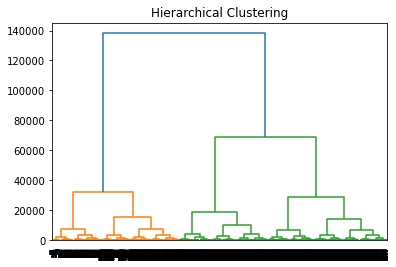

In [29]:
Z = sch.linkage(x,method='ward')
den = sch.dendrogram(Z)
plt.tick_params(
    axis='x',          
    which='Major',      
    bottom=False,     
    top=False,         
    labelbottom=False) 
plt.title('Hierarchical Clustering')
plt.show()

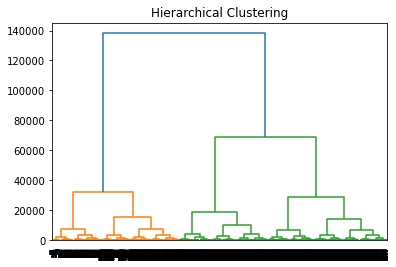

In [30]:
Z = sch.linkage(x,method='ward')
den = sch.dendrogram(Z)
plt.tick_params(
    axis='x',          
    which='Minor',      
    bottom=False,     
    top=False,         
    labelbottom=False) 
plt.title('Hierarchical Clustering')
plt.show()

In [31]:
def fd(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

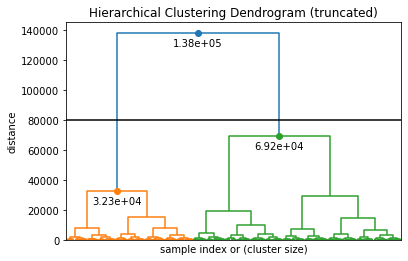

In [32]:
Z = linkage(x,method='ward')
fd(Z,leaf_rotation=90.,show_contracted=True,annotate_above=30000,max_d=80000)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,     
    top=False,         
    labelbottom=False) 

This is special function made to serve the purpose of drawing the line which cuts the generated dendrogram to determine the number of clusters and the dendrogram node(s) which are below the cutting line

In [40]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(x)

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [46]:
clust=(pd.DataFrame(cluster.fit_predict(x)))
print(clust.head())

   0
0  1
1  1
2  1
3  1
4  1


In [45]:
print(clust.value_counts())

0    3392
1    2064
dtype: int64


We can see the values of 0s and 1s in the output since we defined 2 clusters. 0 represents the points that belong to the first cluster and 1 represents points in the second cluster. 